In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Set random seeds for reproducibility
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [15]:
# Load California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame

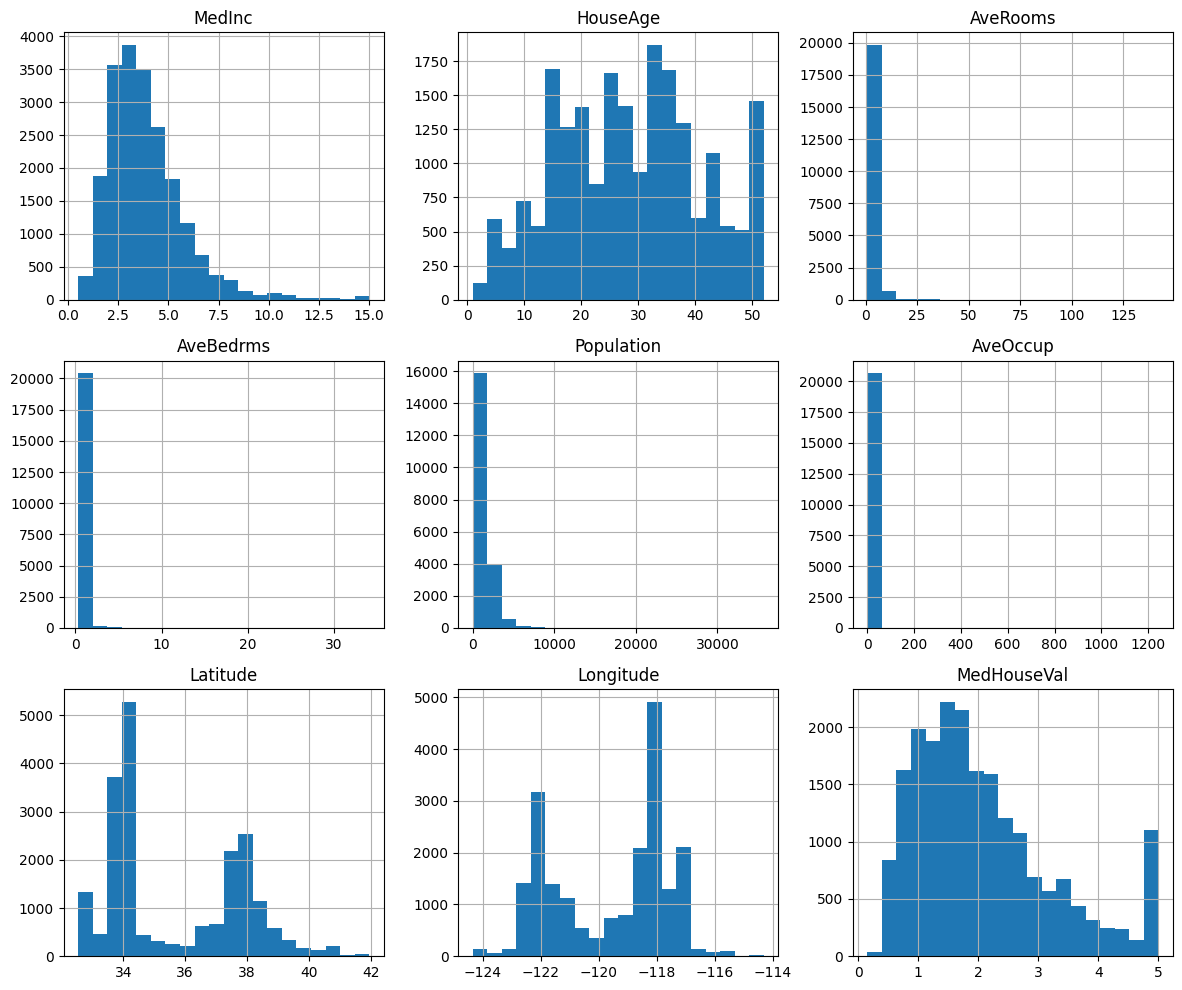

In [16]:
# Exploratory Data Analysis (EDA)
# Histograms of features and target
df.hist(bins=20, figsize=(12,10))
plt.tight_layout()
plt.show()

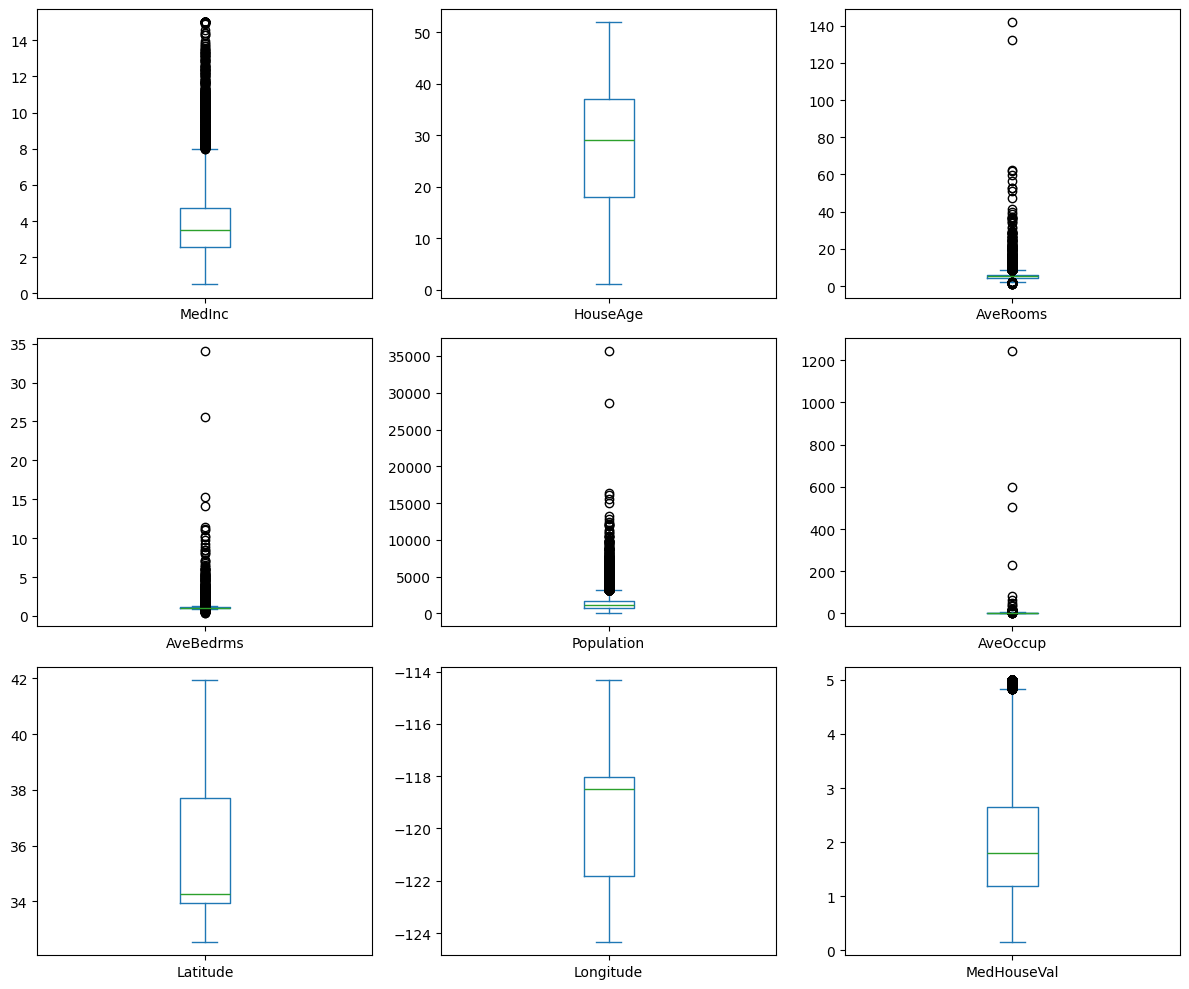

In [17]:
# Boxplots to check for outliers
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(12,10))
plt.tight_layout()
plt.show()

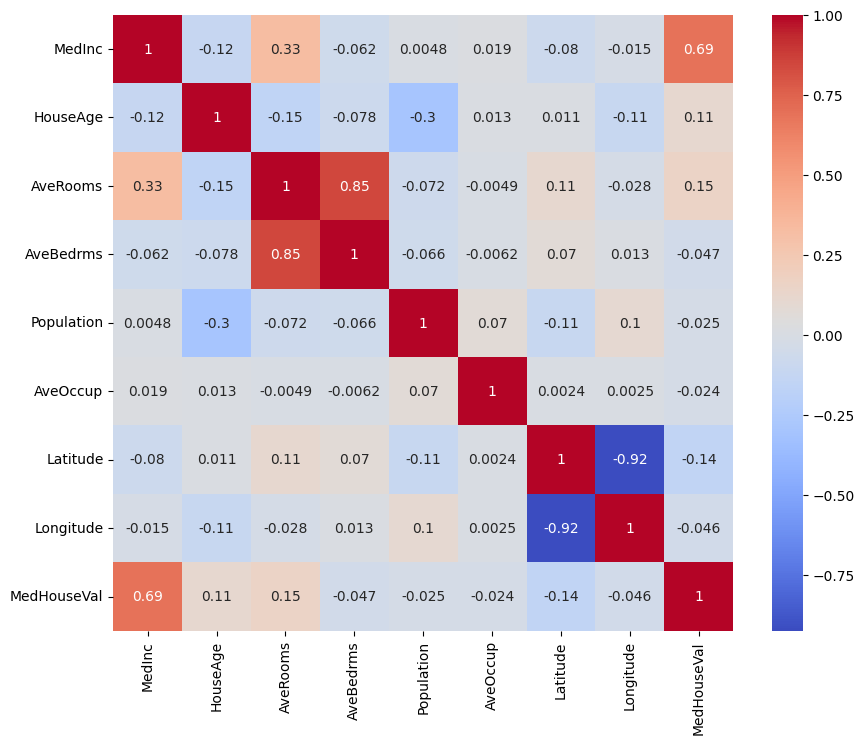

In [18]:
# Correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

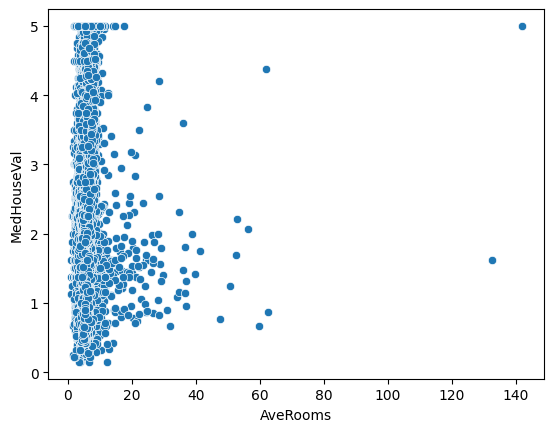

In [19]:
# Scatter plot: average rooms vs median house value
sns.scatterplot(x='AveRooms', y='MedHouseVal', data=df)
plt.show()

In [20]:
# Preprocessing: Train-test split and feature scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
from tensorflow.keras import layers, callbacks, optimizers, Sequential

model = Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer=optimizers.Adam(), loss='mse', metrics=['mse'])
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [23]:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
# Train model with early stopping
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=100,
                    batch_size=32,
                    callbacks=[early_stop])


Epoch 1/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.7930 - mse: 1.7930 - val_loss: 0.4845 - val_mse: 0.4845
Epoch 2/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4343 - mse: 0.4343 - val_loss: 0.4226 - val_mse: 0.4226
Epoch 3/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3845 - mse: 0.3845 - val_loss: 0.4006 - val_mse: 0.4006
Epoch 4/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3662 - mse: 0.3662 - val_loss: 0.3861 - val_mse: 0.3861
Epoch 5/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3530 - mse: 0.3530 - val_loss: 0.3748 - val_mse: 0.3748
Epoch 6/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3427 - mse: 0.3427 - val_loss: 0.3664 - val_mse: 0.3664
Epoch 7/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3325 - mse: 0.3325 - val_loss: 0.3554 - val_mse: 0.3554
Epoch 8/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.3230 - mse: 0.3230 - val_loss: 0.3471 - val_mse: 0.3471
Epoch 9/100
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/

In [26]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test_scaled).flatten()
print("Test MSE:", mean_squared_error(y_test, y_pred))
print("Test R^2:", r2_score(y_test, y_pred))

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Test MSE: 0.2838782588394587
Test R^2: 0.783366671357412
